In [13]:
# Importación de librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from model import Data

In [3]:
CLEAN_ROUTE = './sample_data/clean_data.csv'
clean_data : pd.DataFrame = pd.read_csv(CLEAN_ROUTE)

# Turbiedad por estación

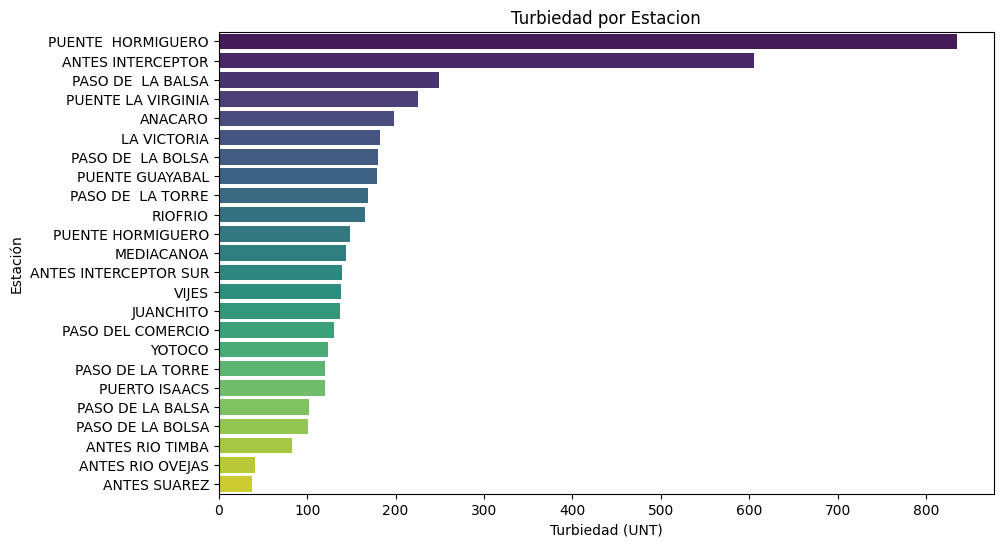

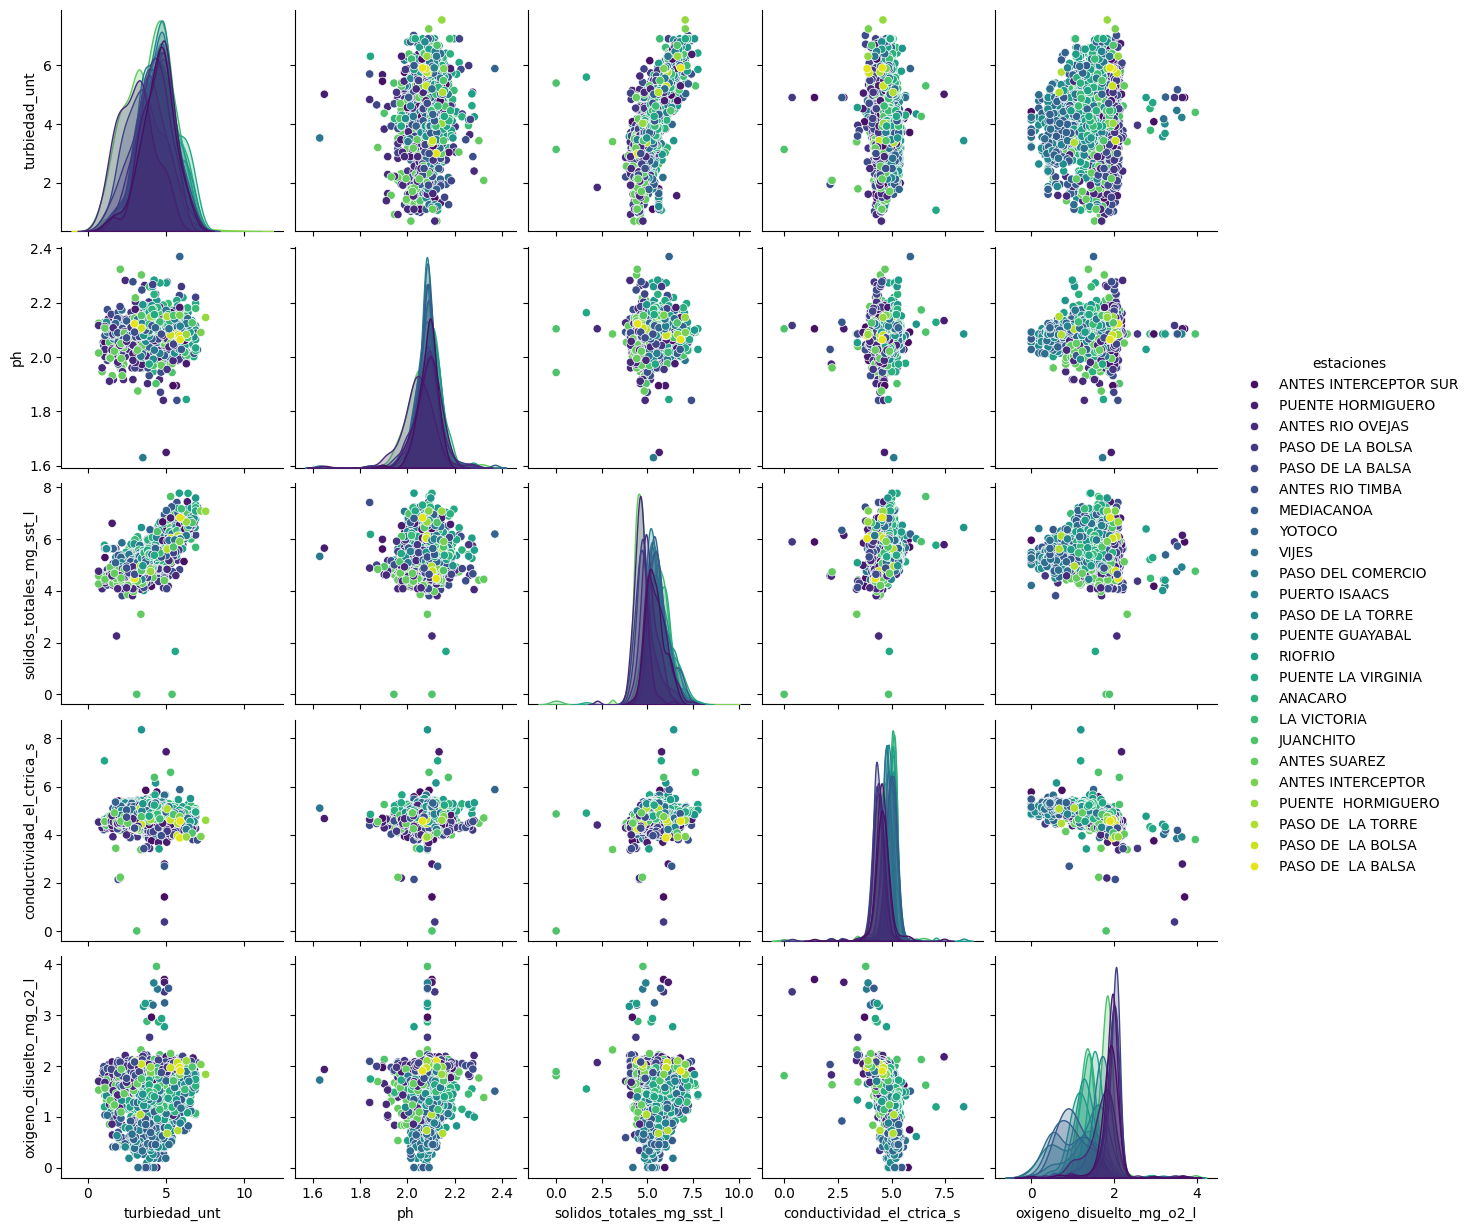

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_turbidity = clean_data.groupby('estaciones')['turbiedad_unt'].mean().reset_index()
avg_turbidity_sorted = avg_turbidity.sort_values(by='turbiedad_unt', ascending=False)  # Orden descendente

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='turbiedad_unt', y='estaciones', data=avg_turbidity_sorted, hue='estaciones', palette='viridis', legend=False)
plt.title('Turbiedad por Estacion')
plt.xlabel('Turbiedad (UNT)')
plt.ylabel('Estación')
plt.show()

# Ver por estaciones los clústerings
# Selecciona de columnas deseadas para el análisis
selected_columns = [Data.TURBIEDAD_UNT, Data.PH, Data.SOLIDOS_TOTALES_MG_SST_L,
                    Data.CONDUCTIVIDAD_EL_CTRICA_S, Data.OXIGENO_DISUELTO_MG_O2_L]

# Aplica el escalamiento logarítmico a las columnas seleccionadas
log_scaled_data = clean_data[selected_columns].apply(np.log1p)  # np.log1p(x) es equivalente a log(1 + x)

# Añade la columna de estaciones para el hue
log_scaled_data[Data.ESTACIONES] = clean_data[Data.ESTACIONES]

# Crear el pairplot con los datos escalados logarítmicamente y categorizados por estaciones
sns.pairplot(log_scaled_data, diag_kind='kde', hue=Data.ESTACIONES, palette='viridis')

# Mostrar el gráfico
plt.show()


## En la grafica se muestra la turbidez promedio en diferentes estaciones.

**Estaciones con mayor turbidez:** Las estaciones "ANTES INTERCEPTOR" y "PUENTE HORMIGUERO" tienen los valores más altos de turbidez, superando los 800 UNT. Estas estaciones pueden representar zonas con mayor contaminación o condiciones que favorecen la presencia de partículas suspendidas en el agua.

**Estaciones con menor turbidez:** Algunas estaciones como "ANTES RIO TIMBA", "ANTES RIO OVEJAS" y "ANTES INTERCEPTOR SUR" tienen niveles de turbidez mucho más bajos, alrededor de los 100 UNT. Esto sugiere que el agua en estas estaciones podría estar más limpia o con menos sedimentos.

**Variabilidad en la turbidez:** Hay una variación significativa en los niveles de turbidez entre las estaciones, lo que indica diferencias importantes en las condiciones del agua dependiendo de la ubicación.

**Color de las barras:** El esquema de colores utilizado (paleta 'viridis') ofrece un buen contraste visual para diferenciar las estaciones, siendo más oscuro para los valores bajos y más claro para los valores altos.

> Sin embargo, al analizar los datos por estación, no observamos una representación significativa, por lo que exploramos otras vías. Eventualmente, encontramos resultados relevantes al centrarnos en la contaminación por metales.

# Distribución de contaminación Metálica

En la grafica se muestra la turbidez promedio en diferentes estaciones.

Estaciones con mayor turbidez: Las estaciones "ANTES INTERCEPTOR" y "PUENTE HORMIGUERO" tienen los valores más altos de turbidez, superando los 800 UNT. Estas estaciones pueden representar zonas con mayor contaminación o condiciones que favorecen la presencia de partículas suspendidas en el agua.

Estaciones con menor turbidez: Algunas estaciones como "ANTES RIO TIMBA", "ANTES RIO OVEJAS" y "ANTES INTERCEPTOR SUR" tienen niveles de turbidez mucho más bajos, alrededor de los 100 UNT. Esto sugiere que el agua en estas estaciones podría estar más limpia o con menos sedimentos.

Variabilidad en la turbidez: Hay una variación significativa en los niveles de turbidez entre las estaciones, lo que indica diferencias importantes en las condiciones del agua dependiendo de la ubicación.

Color de las barras: El esquema de colores utilizado (paleta 'viridis') ofrece un buen contraste visual para diferenciar las estaciones, siendo más oscuro para los valores bajos y más claro para los valores altos.

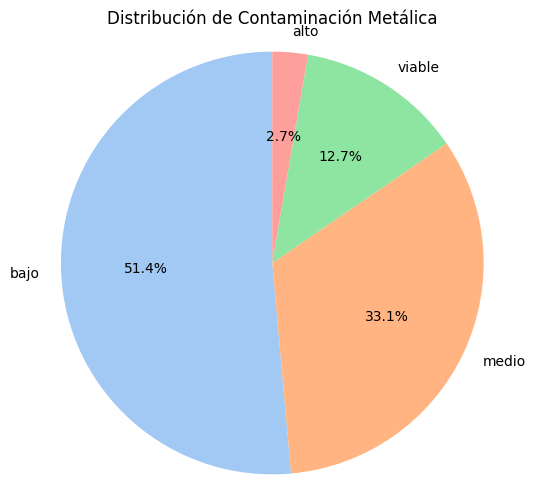

In [5]:
contaminacion_counts = clean_data['contaminacion_metalica'].value_counts()

# Grafica Circular
plt.figure(figsize=(6, 6))
plt.pie(contaminacion_counts, labels=contaminacion_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución de Contaminación Metálica')
plt.axis('equal')
plt.show()

La gráfica circular muestra la distribución de los niveles de contaminación metálica en las estaciones, donde se puede obsevar las siguientes conclusiones al respecto.

1. **Bajo nivel de contaminación:** Representa el 51.4% del total, siendo el mayor porcentaje. Esto indica que la mayoría de las estaciones tienen niveles bajos de contaminación metálica.

2. **Medio nivel de contaminación:** Constituye el 33.1%, siendo el segundo valor más alto. Esto sugiere que una proporción significativa de las estaciones se encuentra en un rango moderado de contaminación.

3. **Contaminación viable:** Representa el 12.7%, lo cual indica que una pequeña porción de las estaciones tiene niveles de contaminación aceptables o viables dentro de los parámetros.

4. **Alto nivel de contaminación:** Solo el 2.7% de las estaciones presenta niveles altos de contaminación metálica, lo cual es un buen indicativo de que la contaminación severa es mínima.

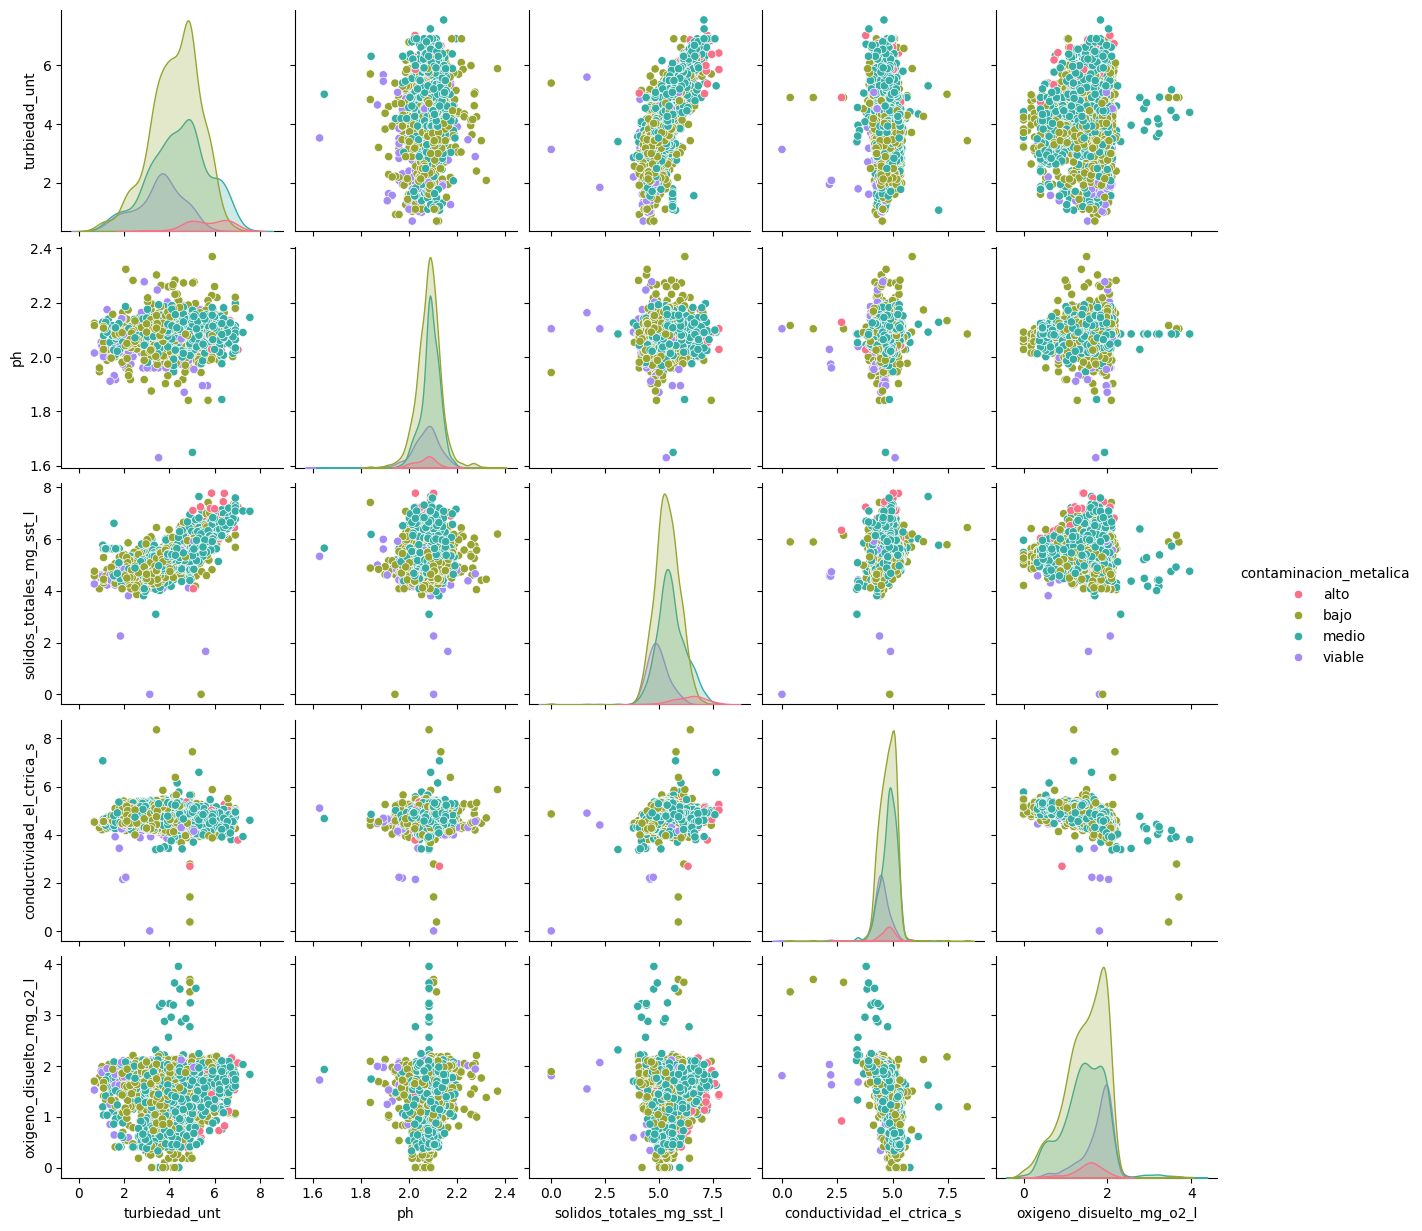

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas deseadas para el análisis
selected_columns = [Data.TURBIEDAD_UNT, Data.PH, Data.SOLIDOS_TOTALES_MG_SST_L,
                    Data.CONDUCTIVIDAD_EL_CTRICA_S, Data.OXIGENO_DISUELTO_MG_O2_L]

# Aplica el escalamiento logarítmico a las columnas seleccionadas
log_scaled_data = clean_data[selected_columns].apply(np.log1p)  # np.log1p(x) es equivalente a log(1 + x)

# Añade la columna de estaciones para el hue
log_scaled_data[Data.CONTAMINACION_METALICA] = clean_data[Data.CONTAMINACION_METALICA]

# Crear el pairplot con los datos escalados logarítmicamente y categorizados por estaciones, paleta diferente de viridis
sns.pairplot(log_scaled_data, diag_kind='kde', hue=Data.CONTAMINACION_METALICA, palette='husl')

# Mostrar el gráfico
plt.show()

En ese momento nos dimos cuenta de que podíamos comenzar a aplicar criterios de clasificación basados en la contaminación, tal como lo hemos hecho en nuestro proyecto de investigación.

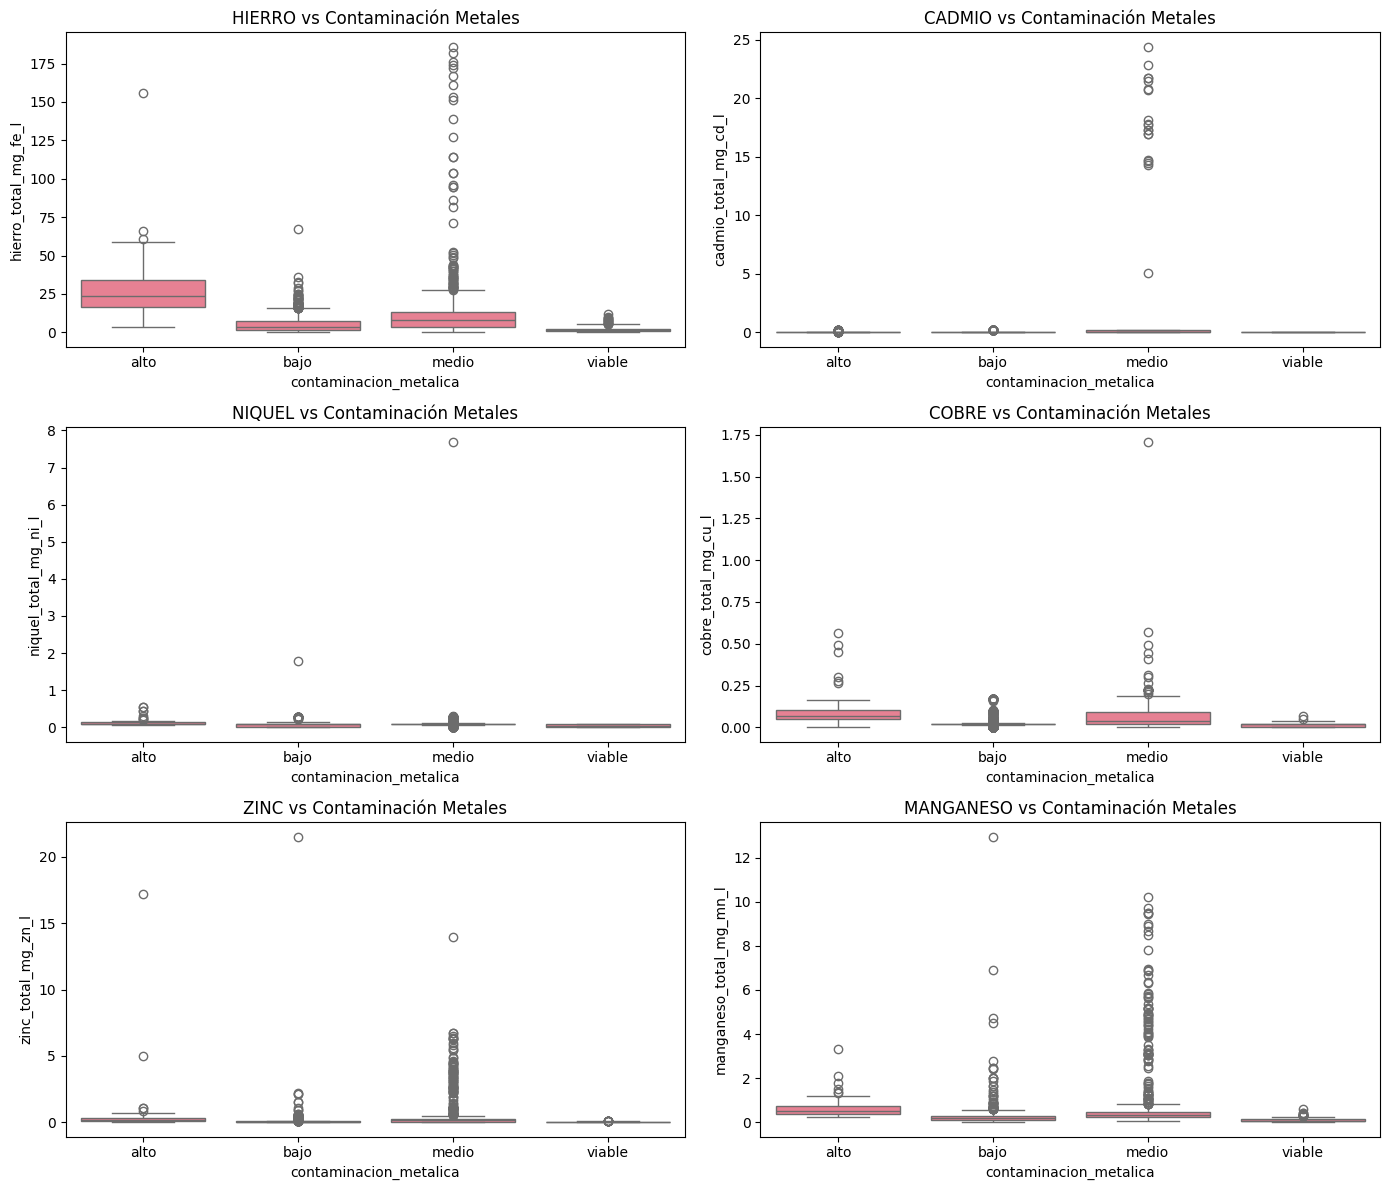

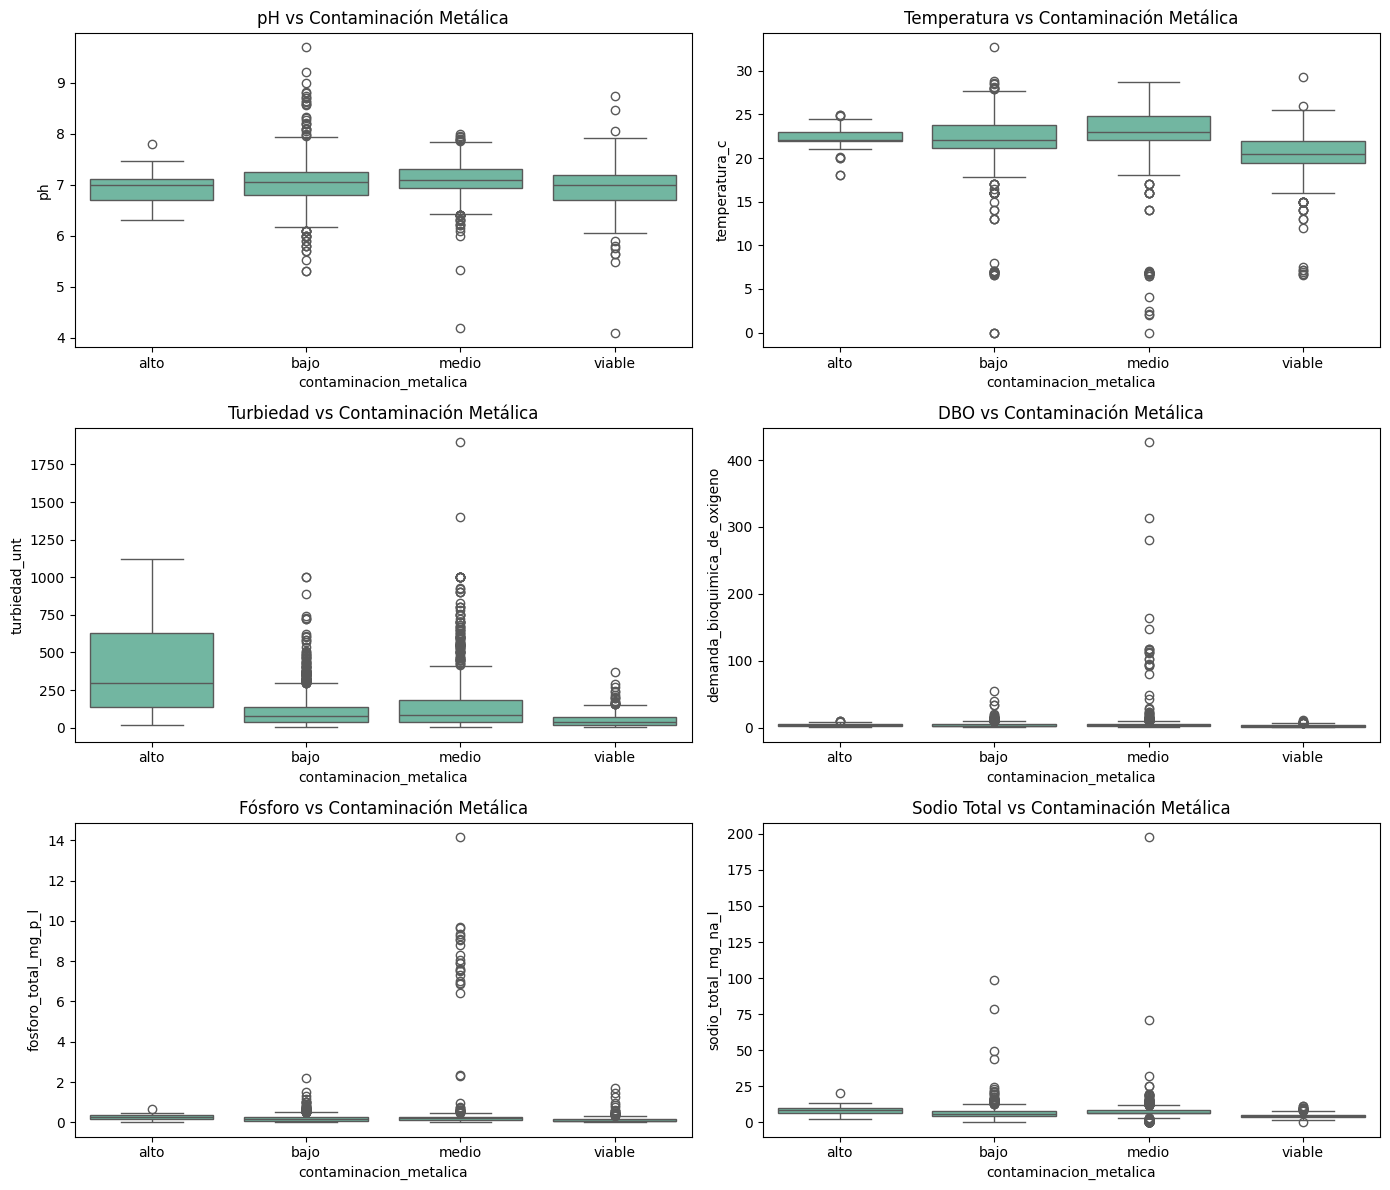

In [11]:
# Set the palette to 'husl'
sns.set_palette("husl")

# Check if 'contaminacion_metalica' exists and is a category
if 'contaminacion_metalica' in clean_data.columns:
    clean_data['contaminacion_metalica'] = clean_data['contaminacion_metalica'].astype('category')
else:
    raise ValueError("Column 'contaminacion_metalica' not found in clean_data")

# List of metal concentration variables for the boxplots
metales = ['hierro_total_mg_fe_l', 'cadmio_total_mg_cd_l', 'niquel_total_mg_ni_l', 'cobre_total_mg_cu_l', 'zinc_total_mg_zn_l', 'manganeso_total_mg_mn_l']

# Check if all metal columns exist in clean_data
missing_columns = [col for col in metales if col not in clean_data.columns]
if missing_columns:
    raise ValueError(f"Columns {missing_columns} not found in clean_data")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Titles for the subplots
titles = ['HIERRO vs Contaminación Metales', 'CADMIO vs Contaminación Metales',
          'NIQUEL vs Contaminación Metales', 'COBRE vs Contaminación Metales',
          'ZINC vs Contaminación Metales', 'MANGANESO vs Contaminación Metales']

# Loop to create the boxplots for each metal
for i, metal in enumerate(metales):
    sns.boxplot(ax=axes[i//2, i%2], x='contaminacion_metalica', y=metal, data=clean_data)
    axes[i//2, i%2].set_title(titles[i])

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


sns.set_palette("Set2")

# Convert 'contaminacion_metalica' to a categorical type for better plotting
clean_data['contaminacion_metalica'] = clean_data['contaminacion_metalica'].astype('category')

# List of variables for the boxplots
metales = ['ph', 'temperatura_c', 'turbiedad_unt', 'demanda_bioquimica_de_oxigeno', 'fosforo_total_mg_p_l','sodio_total_mg_na_l']

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Titles for the subplots
titles = ['pH vs Contaminación Metálica', 'Temperatura vs Contaminación Metálica',
          'Turbiedad vs Contaminación Metálica', 'DBO vs Contaminación Metálica',
          'Fósforo vs Contaminación Metálica',
          'Sodio Total vs Contaminación Metálica']

# Loop to create the boxplots for each variable
for i, metal in enumerate(metales):
    sns.boxplot(ax=axes[i//2, i%2], x='contaminacion_metalica', y=metal, data=clean_data)
    axes[i//2, i%2].set_title(titles[i])

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()